# Lab session 2. Descriptive Statistics and Visualization

In [1]:
import utils_preprocessing, utils_loaddataframe, utils_statsgenerator, corpus_processing
import pandas as pd

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPParser instead.
  """


### Exercise 1 - Text Processing

This functionality is based on spacy library and creates a pipeline for the processing of the documents in our corpus.

Write the outputs into files:

In [2]:
# load the dataframe as we will extract abstracts from it
corpus = utils_loaddataframe.create_daraframe_authors(datapath="./data")
corpus.head()

,authornum,authorabstracts,authorname,books_info,literarymovements,wiki_info
0,a4501,"{'en': 'Christian Nephi Anderson (January 22, ...",Anderson Nephi,{'17249': 'Added Upon A Story (English) (as Au...,[lds fiction],{'en': 'http://en.wikipedia.org/wiki/Nephi_And...
1,a25203,"{'en': 'Poul William Anderson (November 25, 19...",Anderson Poul,{'41064': 'The Chapter Ends (English) (as Auth...,"[historical fiction, time travel, science fict...",{'en': 'http://en.wikipedia.org/wiki/Poul_Ande...
2,a1871,{'en': 'Leonid Nikolaievich Andreyev (Russian:...,Andreyev Leonid,{'49606': 'Anathema: A Tragedy in Seven Scenes...,[realism],{'en': 'http://en.wikipedia.org/wiki/Leonid_An...
3,a35316,"{'en': 'Isaac Asimov (; c. January 2, 1920 – A...",Asimov Isaac,{'55738': 'The Genetic Effects of Radiation (E...,"[hard sf, social sf, golden age of science fic...",{'en': 'http://en.wikipedia.org/wiki/Isaac_Asi...
4,a68,{'en': 'Jane Austen (; 16 December 1775 – 18 J...,Austen Jane,{'31100': 'The Complete Project Gutenberg Work...,[romance novel],{'en': 'http://en.wikipedia.org/wiki/Jane_Aust...


In [5]:
# write files for books to ./processed_books/; filename - authorid_bookid.feature.txt
readpath = "./data/booksample_txt/"
writepath = "./processed_books/"

In [ ]:
corpus_processing.process_book_corpus(readpath, writepath)

In [ ]:
# write files for abstracts; filename - authorid.txt
corpus_processing.process_abstracts(corpus, language="en")

### Exercise 2 - Descriptive statistics

    
    

1. Explore the dataframe

In [4]:
# # UNCOMMENT TO RERUN THE PROCESS
# # # append the columns with processed statistics to the dataframe
# corpus_1 = corpus_processing.fill_dataframe(corpus)
# # # save dataframe to a csv_file
# corpus_1.to_csv("./corpus.csv")
# IF YOU DON'T WANT TO RERUN ALL COMPUTATIONS, LOAD THE DATAFRAME FROM CSV FILE:
corpus_1 = pd.read_csv("./corpus.csv")

# vocabulary size, sentence length and POS distribution are contained in the dataframe in columns: "voc_size", "avg_sent",
# "min_sent", "max_sent" and corresponding POS labels
corpus = corpus_1.drop(columns=["authorabstracts", "books_info", "wiki_info", "literarymovements"])
corpus.head()

,Unnamed: 0,authornum,authorname,voc_size,avg_sent,min_sent,max_sent,ne_places,ne_persons,ne_dates,...,verb,adj,adv,aux,intj,num,pron,propn,punct,other
0,0,a4501,Anderson Nephi,1003,13,1,54,25,79,26,...,679,187,236,10,12,67,267,226,620,1174
1,1,a25203,Anderson Poul,1069,12,1,53,5,41,4,...,660,222,274,11,16,12,311,107,639,977
2,2,a1871,Andreyev Leonid,991,11,1,67,13,85,7,...,664,219,315,10,13,29,319,143,671,985
3,3,a35316,Asimov Isaac,1262,22,2,55,6,39,45,...,959,512,406,3,1,173,140,167,728,1819
4,4,a68,Austen Jane,1272,22,1,109,33,116,21,...,1224,366,539,7,16,36,619,305,918,1831


10 most frequent NEs for each author; we will print it for the first five authors

In [5]:
for i in corpus[:5].index:
    author = corpus["authornum"].at[i]
    doc = utils_preprocessing.process_an_author(author, readpath = "./data/booksample_txt/")
    print(utils_statsgenerator.frequent_ne(doc, n=10))

{'places': [('Utah', 4), ('Ohio', 3), ('the United States', 2), ('America', 2), ('Buffalo', 1), ('Independence', 1), ('Spain', 1), ('California', 1), ('Nevada', 1), ('Arizona', 1)], 'persons': [('Joseph', 6), ('Carlia', 5), ('Uncle Zed', 4), ('Dorian', 4), ('Rupert', 4), ('Mildred', 3), ('Saints', 3), ('Signe', 3), ('Rupert Ames', 3), ('Brigham Young', 2)], 'dates': [('Sunday', 2), ('The Christmas holidays that season', 1), ('July, 1858', 1), ('one year', 1), ('the next day', 1), ('March 4, 1849', 1), ('the next year', 1), ('Nearly every day', 1), ('April 6, 1840', 1), ('a few years', 1)]}
{'places': [('Harris', 1), ('Colorado', 1), ('Seilles', 1), ('Valgolia', 1), ('Empire', 1)], 'persons': [('Berg', 6), ('Svearek', 3), ('Barbara', 3), ('Cappen', 2), ('Con', 2), ('Riley', 2), ('Lancaster', 1), ('Charon', 1), ('Ici', 1), ('Jessup', 1)], 'dates': [('summer', 1), ('today', 1), ('these days', 1), ('some day', 1)]}
{'places': [('Liuba', 7), ('Màrkusha', 1), ('the Kingdom of Heaven', 1), ('

In [ ]:
# min, max, avg number of NPs and VPs per sentence per author - for one author, 10 sentences from the author
# to shorten the processing time

In [5]:
author = corpus["authornum"].at[2]
doc = utils_preprocessing.process_an_author(author, readpath = "./data/booksample_txt/")
sentences = utils_preprocessing.segment_sentences(doc)
trees = utils_preprocessing.const_parsing(sentences, n=10)
averageNP, minimumNP, maximumNP = utils_statsgenerator.count_phrase_sentence(trees, "NP", 10)
print("NPs: " + "average: " + str(averageNP), "minimum: " + str(minimumNP), "maximum: "+ str(maximumNP))

averageVP, minimumVP, maximumVP = utils_statsgenerator.count_phrase_sentence(trees, "VP", 10)
print("VPs: " + "average: " + str(averageVP), "minimum: " + str(minimumVP), "maximum: "+ str(maximumVP))


Parsing...
NPs: average: 1.76 minimum: 1 maximum: 17
Parsing...
VPs: average: 0.74 minimum: 1 maximum: 9


### Visualization

1. Vocabulary size for each author:
    

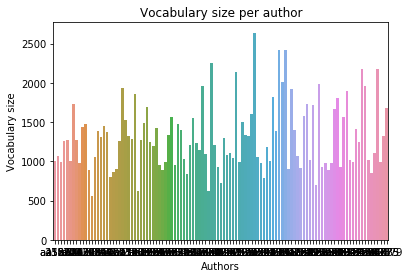

In [9]:
utils_statsgenerator.vocabulary_size(corpus)

In [10]:
# for i in corpus.index:
#     author = corpus["authornum"].at[i]
utils_statsgenerator.minmax(corpus["max_sent"])

(22, 5309)

2. A box plot showing min, max, avg sentence length per author (for the first 10 authors)


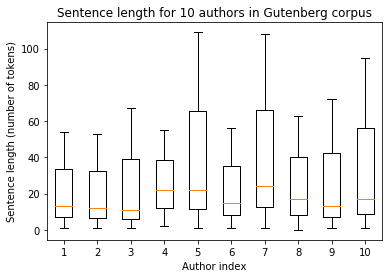

In [9]:
utils_statsgenerator.sentencelen(corpus, 9)


3. POS distribution for the first 10 authors


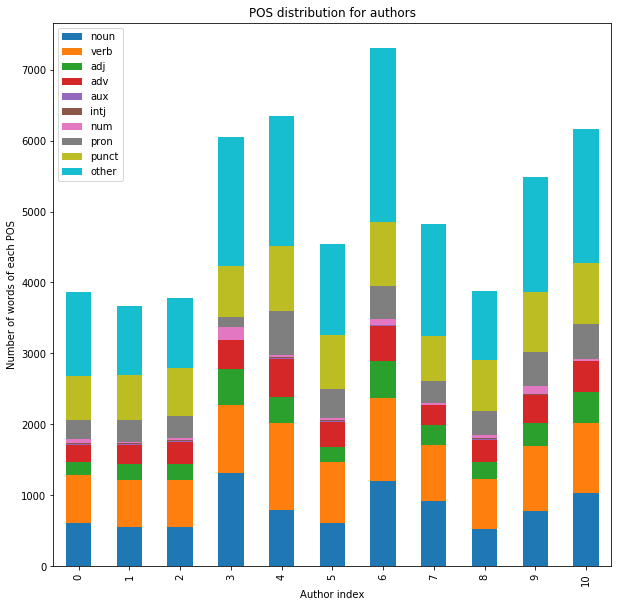

In [10]:
utils_statsgenerator.pos_distribution(corpus, 9)


4. Wordclouds of the first 10 authors


Anderson Nephi


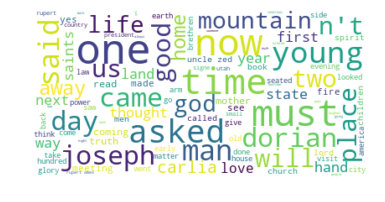

Anderson Poul


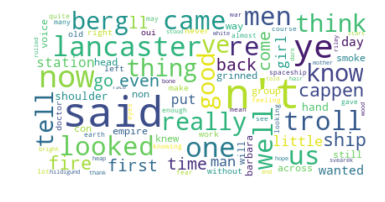

Andreyev Leonid


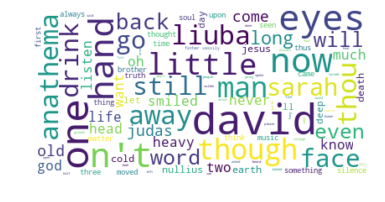

Asimov Isaac


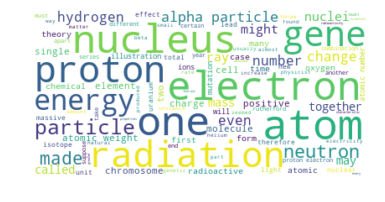

Austen Jane


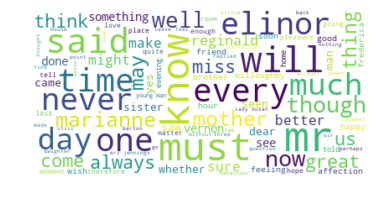

Barrie J. M. (James Matthew)


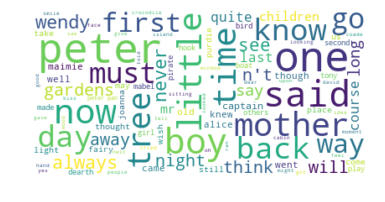

Belloc Hilaire


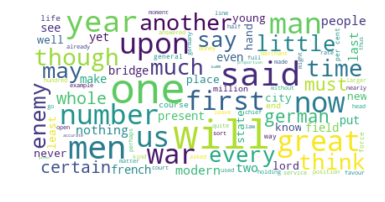

Bierce Ambrose


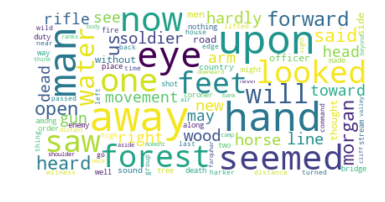

Bixby Jerome


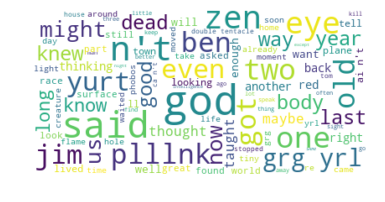

Blackmore R. D. (Richard Doddridge)


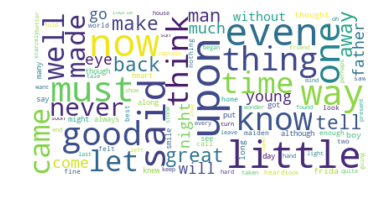

In [11]:
utils_statsgenerator.word_cloud(corpus[:10])